# Tugas 1 DSC ITB
## Exploratory Data Analysis
- Nama lengkap: Muhammad Helmi Hibatullah
- NIM: 16520340
- Asal universitas: Institut Teknologi Bandung
- Tanggal mulai pengerjaan tugas: 13 November 2020
- Sumber dataset: https://www.kaggle.com/crawford/80-cereals

## Deskripsi Data
- Data yang digunakan mengenai data nutrisi dari 80 produk sereal.
- Data akan diolah untuk mendapatkan perbandingan antara pabrik-pabrik pembuatan terhadap tingkat kadar gula pada sereal, dan rata-rata rating produk sereal; korelasi antar nutrisi; dan korelasi rating terhadap nutrisi. 

## Persiapan Data

In [1]:
# import libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca file .csv
df = pd.read_csv("cereal.csv")
pd. options.display.max_columns = None

In [2]:
# Mengecek jumlah baris dan kolom
df.shape

(77, 16)

In [3]:
# Menampilkan 5 baris pertama data
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [4]:
# Info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 8.8+ KB


In [5]:
# Mencari nilai negatif pada semua kolom yang berisi data numerik
nilai_negatif = list(df.loc[(df["calories"] < 0) | (df["protein"] < 0) | (df["fat"] < 0) | (df["sodium"] < 0) | (df["fiber"] < 0) | (df["carbo"] < 0) | (df["sugars"] < 0) | (df["potass"] < 0) | (df["vitamins"] < 0) | (df["shelf"] < 0) | (df["weight"] < 0) | (df["cups"] < 0) | (df["rating"] < 0)].index)

print("baris/index yang memiliki nilai negatif: ", nilai_negatif)

baris/index yang memiliki nilai negatif:  [4, 20, 57]


In [6]:
# Drop baris yang memiliki nilai negatif
nilai_negatif = list(df.loc[(df["calories"] < 0) | (df["protein"] < 0) | (df["fat"] < 0) | (df["sodium"] < 0) | (df["fiber"] < 0) | (df["carbo"] < 0) | (df["sugars"] < 0) | (df["potass"] < 0) | (df["vitamins"] < 0) | (df["shelf"] < 0) | (df["weight"] < 0) | (df["cups"] < 0) | (df["rating"] < 0)].index)

df.drop(df.index[nilai_negatif], inplace=True)

## 1. Karakteristik Data

### 1.1 Karakteristik kolom nama
- Kolom ini berisi nama sereal
- Berikut range dari kolom nama:

In [7]:
print(df.name.unique())
print(df["name"].describe())

['100% Bran' '100% Natural Bran' 'All-Bran' 'All-Bran with Extra Fiber'
 'Apple Cinnamon Cheerios' 'Apple Jacks' 'Basic 4' 'Bran Chex'
 'Bran Flakes' "Cap'n'Crunch" 'Cheerios' 'Cinnamon Toast Crunch'
 'Clusters' 'Cocoa Puffs' 'Corn Chex' 'Corn Flakes' 'Corn Pops'
 'Count Chocula' "Cracklin' Oat Bran" 'Crispix' 'Crispy Wheat & Raisins'
 'Double Chex' 'Froot Loops' 'Frosted Flakes' 'Frosted Mini-Wheats'
 'Fruit & Fibre Dates; Walnuts; and Oats' 'Fruitful Bran' 'Fruity Pebbles'
 'Golden Crisp' 'Golden Grahams' 'Grape Nuts Flakes' 'Grape-Nuts'
 'Great Grains Pecan' 'Honey Graham Ohs' 'Honey Nut Cheerios' 'Honey-comb'
 'Just Right Crunchy  Nuggets' 'Just Right Fruit & Nut' 'Kix' 'Life'
 'Lucky Charms' 'Maypo' 'Muesli Raisins; Dates; & Almonds'
 'Muesli Raisins; Peaches; & Pecans' 'Mueslix Crispy Blend'
 'Multi-Grain Cheerios' 'Nut&Honey Crunch' 'Nutri-Grain Almond-Raisin'
 'Nutri-grain Wheat' 'Oatmeal Raisin Crisp' 'Post Nat. Raisin Bran'
 'Product 19' 'Puffed Rice' 'Puffed Wheat' 'Quaker O

### 1.2 Karakteristik kolom mfr
- Kolom ini berisi nama manufaktur yang memproduksi sereal
- Berikut range dari kolom mfr:

In [8]:
print(df.mfr.unique())
print("A = American Home Food Products \nG = General Mills \nK = Kelloggs \nN = Nabisco \nP = Post \nQ = Quaker Oats \nR = Ralston Purina")
print(df["mfr"].describe())

['N' 'Q' 'K' 'G' 'R' 'P' 'A']
A = American Home Food Products 
G = General Mills 
K = Kelloggs 
N = Nabisco 
P = Post 
Q = Quaker Oats 
R = Ralston Purina
count     74
unique     7
top        K
freq      23
Name: mfr, dtype: object


### 1.3 Karakteristik kolom type
- Kolom ini berisi type sereal, H untuk 'Hot' dan C untuk 'Cold'
- Berikut range dari kolom type:

In [9]:
print(df.type.unique())
print(df["type"].describe())

['C' 'H']
count     74
unique     2
top        C
freq      73
Name: type, dtype: object


### 1.4 Karakteristik kolom calories
- Kolom ini berisi jumlah kalori per sajian yang dimiliki tiap sereal

In [10]:
df["calories"].describe()

count     74.000000
mean     107.027027
std       19.843893
min       50.000000
25%      100.000000
50%      110.000000
75%      110.000000
max      160.000000
Name: calories, dtype: float64

### 1.5 Karakteristik kolom protein
- Kolom ini berisi jumlah gram protein per sajian yang dimiliki tiap sereal

In [11]:
df["protein"].describe()

count    74.000000
mean      2.513514
std       1.075802
min       1.000000
25%       2.000000
50%       2.500000
75%       3.000000
max       6.000000
Name: protein, dtype: float64

### 1.6 Karakteristik kolom fat
- Kolom ini berisi jumlah gram lemak per sajian yang dimiliki tiap sereal

In [12]:
df["fat"].describe()

count    74.000000
mean      1.000000
std       1.006826
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       5.000000
Name: fat, dtype: float64

### 1.7. Karakteristik kolom sodium
- Kolom ini berisi jumlah miligram sodium per sajian yang dimiliki tiap sereal

In [13]:
df["sodium"].describe()

count     74.000000
mean     162.364865
std       82.769787
min        0.000000
25%      135.000000
50%      180.000000
75%      217.500000
max      320.000000
Name: sodium, dtype: float64

### 1.8 Karakteristik kolom fiber
- Kolom ini berisi jumlah gram dietary fiber per sajian yang dimiliki tiap sereal

In [14]:
df["fiber"].describe()

count    74.000000
mean      2.175676
std       2.423391
min       0.000000
25%       0.250000
50%       2.000000
75%       3.000000
max      14.000000
Name: fiber, dtype: float64

### 1.9 Karakteristik kolom carbo
- Kolom ini berisi jumlah gram karbohidrat kompleks per sajian yang dimiliki tiap sereal

In [15]:
df["carbo"].describe()

count    74.000000
mean     14.729730
std       3.891675
min       5.000000
25%      12.000000
50%      14.500000
75%      17.000000
max      23.000000
Name: carbo, dtype: float64

### 1.10 Karakteristik kolom sugars
Kolom ini berisi jumlah gram gula per sajian yang dimiliki tiap sereal

In [16]:
df["sugars"].describe()

count    74.000000
mean      7.108108
std       4.359111
min       0.000000
25%       3.000000
50%       7.000000
75%      11.000000
max      15.000000
Name: sugars, dtype: float64

### 1.11 Karakteristik kolom potass
- Kolom ini berisi jumlah miligram potassium per sajian yang dimiliki tiap sereal

In [17]:
df["potass"].describe()

count     74.000000
mean      98.513514
std       70.878681
min       15.000000
25%       41.250000
50%       90.000000
75%      120.000000
max      330.000000
Name: potass, dtype: float64

### 1.12 Karakteristik kolom vitamins
- Kolom ini berisi tentang vitamin dan mineral per sajian (0, 25, atau 100 yang mengindikasikan persentase tipikal dari rekomendasi FDA) yang dimiliki tiap sereal

In [18]:
df["vitamins"].describe()

count     74.000000
mean      29.054054
std       22.294352
min        0.000000
25%       25.000000
50%       25.000000
75%       25.000000
max      100.000000
Name: vitamins, dtype: float64

### 1.13 Karakteristik kolom shelf
- Kolom ini menunjukan letak sereal di rak display (1, 2 , atau 3 dihitung dari lantai)

In [19]:
df["shelf"].describe()

count    74.000000
mean      2.216216
std       0.832067
min       1.000000
25%       1.250000
50%       2.000000
75%       3.000000
max       3.000000
Name: shelf, dtype: float64

### 1.14 Karakteristik kolom weight
- Kolom ini berisi berat per sajian dalam ons yang dimiliki tiap sereal

In [20]:
df["weight"].describe()

count    74.000000
mean      1.030811
std       0.153416
min       0.500000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.500000
Name: weight, dtype: float64

### 1.15 Karakteristik kolom cups
- Kolom ini berisi jumlah cangkir per sajian yang dimiliki tiap sereal

In [21]:
df["cups"].describe()

count    74.000000
mean      0.821622
std       0.235715
min       0.250000
25%       0.670000
50%       0.750000
75%       1.000000
max       1.500000
Name: cups, dtype: float64

### 1.16 Karakteristik kolom rating
- Kolom ini berisi rating yang dimiliki tiap sereal (kemungkinan berasal dari penilaian konsumen)

In [22]:
df["rating"].describe()

count    74.000000
mean     42.371787
std      14.033712
min      18.042851
25%      32.449210
50%      40.253087
75%      50.520610
max      93.704912
Name: rating, dtype: float64

## 2. Statistik Data

### 2.1 Lima baris data teratas pada dataset

In [23]:
# Menampilkan lima baris data teratas pada dataset
print(df.head())

                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100% Bran   N    C        70        4    1     130   10.0   
1          100% Natural Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
5    Apple Cinnamon Cheerios   G    C       110        2    2     180    1.5   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    5.0       6     280        25      3     1.0  0.33  68.402973  
1    8.0       8     135         0      3     1.0  1.00  33.983679  
2    7.0       5     320        25      3     1.0  0.33  59.425505  
3    8.0       0     330        25      3     1.0  0.50  93.704912  
5   10.5      10      70        25      1     1.0  0.75  29.509541  


### 2.2 Statistik data kuantitatif

In [24]:
# Menampilkan statistik data kuantitatif
print("Berikut merupakan statistik dari data yang kuantitatif")
print(df.describe())

Berikut merupakan statistik dari data yang kuantitatif
         calories    protein        fat      sodium      fiber      carbo  \
count   74.000000  74.000000  74.000000   74.000000  74.000000  74.000000   
mean   107.027027   2.513514   1.000000  162.364865   2.175676  14.729730   
std     19.843893   1.075802   1.006826   82.769787   2.423391   3.891675   
min     50.000000   1.000000   0.000000    0.000000   0.000000   5.000000   
25%    100.000000   2.000000   0.000000  135.000000   0.250000  12.000000   
50%    110.000000   2.500000   1.000000  180.000000   2.000000  14.500000   
75%    110.000000   3.000000   1.000000  217.500000   3.000000  17.000000   
max    160.000000   6.000000   5.000000  320.000000  14.000000  23.000000   

          sugars      potass    vitamins      shelf     weight       cups  \
count  74.000000   74.000000   74.000000  74.000000  74.000000  74.000000   
mean    7.108108   98.513514   29.054054   2.216216   1.030811   0.821622   
std     4.359111   7

### 2.3 Persentil data kuantitatif

In [25]:
# Menampilkan persentil data kuantitatif
print("Berikut persentil untuk data kuantitatif")
print(df.quantile([.10,.25,.50,.75,.90]))

Berikut persentil untuk data kuantitatif
      calories  protein  fat  sodium  fiber  carbo  sugars  potass  vitamins  \
0.10      90.0      1.0  0.0     4.5   0.00   10.5     2.0   30.00      25.0   
0.25     100.0      2.0  0.0   135.0   0.25   12.0     3.0   41.25      25.0   
0.50     110.0      2.5  1.0   180.0   2.00   14.5     7.0   90.00      25.0   
0.75     110.0      3.0  1.0   217.5   3.00   17.0    11.0  120.00      25.0   
0.90     127.0      4.0  2.0   257.0   4.70   21.0    13.0  190.00      25.0   

      shelf  weight  cups     rating  
0.10   1.00   1.000  0.50  27.835040  
0.25   1.25   1.000  0.67  32.449210  
0.50   2.00   1.000  0.75  40.253087  
0.75   3.00   1.000  1.00  50.520610  
0.90   3.00   1.285  1.00  59.577637  


### Penjelasan
Standar deviasi pada beberapa data nutrisi sangat tinggi, yaitu pada data nutrisi kalori, sodium, potassium, dan vitamin. Hal ini mengindikasikan data sangat tersebar jauh dari rata-ratanya. Sedangkan data kuantitatif lainnya berpusat di sekitar rata-ratanya.

## 3. Visualisasi Data

### 3.1 Perbandingan pabrik-pabrik pembuat sereal terhadap tingkat kadar gula pada produk sereal

<AxesSubplot:xlabel='mfr', ylabel='sugars'>

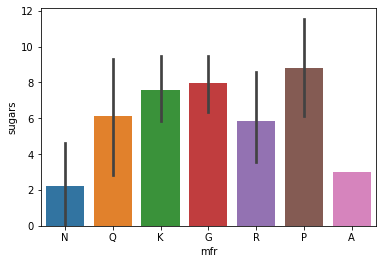

In [26]:
sns.barplot(x = "mfr", y = 'sugars',data = df)

Sebagai pengingat:
- A = American Home Food Products 
- G = General Mills 
- K = Kelloggs 
- N = Nabisco 
- P = Post 
- Q = Quaker Oats 
- R = Ralston Purina

Dari grafik diatas dapat dilihat tingkat kadar gula terendah dimiliki produk sereal buatan pabrik Nabisco dan tingkat kadar gula tertinggi dimiliki oleh produk buatan pabrik Post. Berikut daftar pabrik diurutkan berdasarkan tingkat kadar gula pada produknya dimulai dari yang terendah:
1. Nabisco  
2. American Home Food Products  
3. Ralston Purina  
4. Quaker Oats  
5. Kelloggs  
6. General Mills  
7. Post  

### 3.2 Perbandingan pabrik-pabrik pembuat sereal terhadap rating produknya masing-masing

<AxesSubplot:xlabel='mfr', ylabel='rating'>

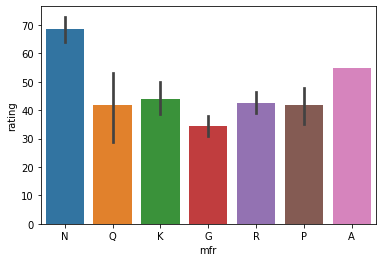

In [27]:
sns.barplot(x = "mfr", y = 'rating',data = df)

Dari grafik perbandingan pabrik-pabrik terhadap rating di atas, dapat dilihat bahwa pabrik Nabisco memiliki rating tertinggi untuk produk-produk sereal buatannya, sebaliknya pabrik General Mills memiliki rating terendah untuk produk-produk serealnya. Berikut urutan pabrik berdasarkan rating dari yang tertinggi:  
1. Nabisco  
2. American Home Food Products  
3. Kellogs  
4. Ralston Purina
5. Quaker Oats  
6. Post  
7. General Mills

### 3.3 Korelasi antarnutrisi dan rating

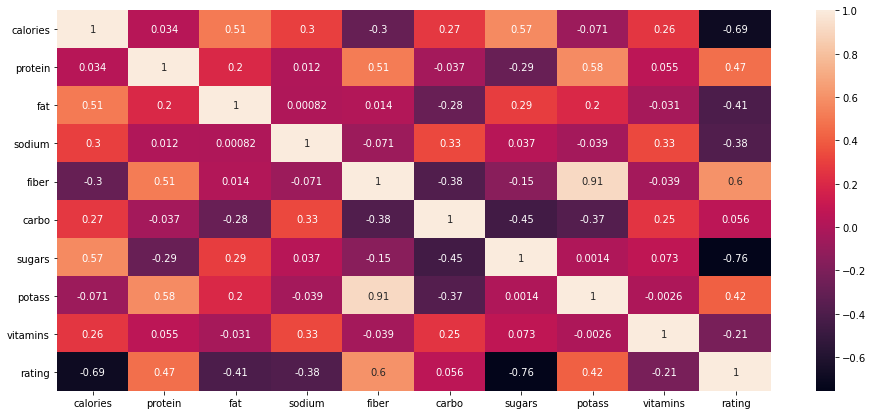

In [28]:
# Pilih kolom data yang memuat nutrisi dan rating
nutrisi_rating = df[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'rating']]

# Gunakan heatmap untuk melihat korelasi antar nutrisi serta ratingnya
plt.figure(figsize=(16,7))
cor = sns.heatmap(nutrisi_rating.corr(), annot = True)

#### 3.3.1 Korelasi antarnutrisi
Dari plot heatmap diatas dapat kita lihat bahwa  
jumlah gram dietary fiber sangat korelatif positif terhadap jumlah miligram potassium karena koefisien korelasinya 0.91;  
jumlah kalori cukup korelatif positif dengan lemak dan gula dengan koefisien korelasi masing-masing 0.51 dan 0.57;  
jumlah protein cukup korelatif positif dengan jumlah fiber dan potassium dengan koefisien korelasi masing-masing 0.51 dan 0.58;  
jumlah karbohidrat sedikit berkorelasi negatif dengan jumlah fiber, gula, dan potassium dengan koefisien korelasi masing-masing -0.38, -0.45, dan -0.37;    
sedangkan vitamin dianggap kurang berkorelasi terhadap jumlah nutrisi lainnya karena koefisien korelasinya -0.3 < r < 0.3 .

### 3.3.2 Korelasi nutrisi terhadap rating
Dari plot heatmap diatas dapat kita lihat juga bahwa
rating cukup korelatif positif terhadap jumlah protein, fiber, dan potassium dengan koefisien korelasi masing-masing 0.47, 0.6, dan 0.42;  
rating sangat berkorelasi negatif terhadap jumlah kalori dan gula dengan masing-masing koefisien korelasi -0.69 dan -0.76;  
rating cukup berkorelasi negatif terhadap jumlah lemak dan sodium dengan masing-masing koefisien korelasi -0.41 dan -0,38;  
dan rating kurang berkorelasi dengan jumlah karbohidrat dan vitamin karena koefisien korelasinya -0.3 < r < 0.3 . 
Dari sini kita bisa mengetahui bahwa sereal-sereal yang kandungan protein, fiber, dan potassiumnya cukup tinggi memiliki rating yang relatif lebih tinggi, sedangkan sereal yang kandungan gula, kalori, lemak, dan sodiumnya tinggi memiliki rating yang relatif lebih rendah daripada yang lain. 
Dapat disimpulkan bahwa untuk meraih rating yang cukup bagus pada produk sereal harus memiliki kandungan protein, fiber, dan potassium yang cukup tinggi; dan memiliki kandungan gula, kalori, lemak, dan sodium yang rendah.

#### Catatan:
Misal x berkorelasi positif terhadap y, maka makin besar x makin besar juga y. Berlaku sebaliknya untuk berkorelasi negatif, makin besar x makin kecil y.